<a href="https://colab.research.google.com/github/opinaka/Mixture/blob/master/spark2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
import time

start_time = time.time()

!wget -q http://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

end_time = time.time()
download_time = end_time - start_time
print("Temps de téléchargement : {} secondes".format(download_time))

Temps de téléchargement : 16.685839653015137 secondes


In [ ]:
!tar xf spark-3.5.0-bin-hadoop3.tgz
#
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install -q findspark
#

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"
#
import findspark
findspark.init()
#### end head Google-colab

La première étape cruciale dans l'analyse de données consiste en leur description. Souvent, les enquêtes se concentrent uniquement sur cette phase, qui offre une première compréhension des résultats ou permet d'identifier des relations entre les variables étudiées. Cette étape sert de base pour des analyses plus avancées, telles que la simplification des données (par exemple, via des analyses factorielles) ou leur regroupement en typologies. Elle est également essentielle pour des analyses plus sophistiquées visant à expliquer les données (comme les régressions, les analyses de variance ou les analyses conjointes).

L'objectif de ce tutoriel est de présenter les principales méthodes de description des données afin d'effectuer une première analyse des données recueillies lors d'une enquête. Après avoir examiné la nature des variables, nous aborderons les tableaux croisés ainsi que les principaux tests statistiques qui y sont associés, y compris les tests d'hypothèses paramétriques et non paramétriques.

## Caractérisation d'une variable

Le terme "variable" désigne l'ensemble des données observées sur différents individus pour une caractéristique donnée (Tenenhaus, 1996). Une variable est qualifiée de qualitative si elle est composée de modalités ; elle peut être de type nominale (lorsque les modalités ne présentent aucune structure particulière) ou ordinale (lorsque les modalités sont ordonnées). Une variable est considérée comme quantitative ou métrique si ses modalités peuvent être mesurées (par exemple l'âge, la valeur d'une action, etc.).

### ANALYSE D'UNE VARIABLE QUALITATIVE

L'analyse d'une variable qualitative implique la présentation des effectifs, représentant le nombre d'individus de l'échantillon pour chaque modalité de la variable, ainsi que des fréquences, indiquant le nombre de réponses associées à chaque modalité de la variable étudiée. Souvent, le responsable de l'étude cherche à répondre à une série de questions se rapportant à une seule et même variable.

### ANALYSE D'UNE VARIABLE QUANTITATIVE

La description d'une variable quantitative implique l'examen de plusieurs critères :
- **Mesures de la tendance centrale :** Ces mesures incluent la moyenne, la médiane et le mode.
- **Mesures de la dispersion :** Elles comprennent l'étendue, la variance, l'écart type et le coefficient de variation.
- **Mesures de la distribution :** Cela englobe l'asymétrie et l'aplatissement de la distribution.
- **Représentations graphiques :** Des visualisations telles que les histogrammes ou les boîtes à moustaches sont souvent utilisées pour illustrer la distribution des données.

#### Mesures de la tendance centrale

Les mesures de la tendance centrale sont utilisées pour résumer une série d'observations en une valeur considérée comme représentative. La moyenne arithmétique est couramment employée, calculée en additionnant toutes les valeurs observées et en les divisant par le nombre total d'observations. Cependant, si des valeurs extrêmes affectent fortement la moyenne, il est préférable d'utiliser la médiane, qui est moins sensible aux valeurs aberrantes. La médiane représente la valeur au milieu de la distribution, séparant les données en deux parties égales. Enfin, le mode est la valeur qui apparaît le plus fréquemment dans la série de données. Si plusieurs valeurs ont la même fréquence maximale, elles sont toutes considérées comme des modes.

#### Mesures de la dispersion

Les mesures de dispersion utilisent plusieurs indicateurs pour quantifier la variabilité des données. L'étendue, également appelée intervalle, est la différence entre la plus grande et la plus petite valeur observée. La variance mesure la dispersion des données par rapport à la moyenne, calculée en faisant la somme des carrés des écarts par rapport à la moyenne, puis en divisant par le nombre d'observations moins un. Une faible variance indique que les données sont relativement proches de la moyenne, tandis qu'une variance élevée indique une dispersion importante des données autour de la moyenne. Cependant, la variance est sensible aux valeurs extrêmes. L'écart type, exprimé dans la même unité que la variable, est la racine carrée de la variance. Il offre une mesure de dispersion plus intuitive que la variance. Le coefficient de variation, exprimé en pourcentage, est le rapport de l'écart type à la moyenne. Il permet de comparer la variabilité relative entre des échantillons présentant des moyennes différentes, mais issus de la même distribution.

# Statistics

Voici la traduction des fonctions Spark MLlib que vous avez mentionnées :

1. `chiSqTest(observed[, expected])`: Si observed est un vecteur, effectue un test du khi-deux de Pearson pour vérifier l'ajustement des données observées par rapport à la distribution attendue, ou par rapport à la distribution uniforme (par défaut), avec chaque catégorie ayant une fréquence attendue de 1 / len(observed).

2. `colStats(rdd)`: Calcule les statistiques sommaires par colonne pour le RDD d'entrée [Vector].

3. `corr(x[, y, method])`: Calcule la corrélation (matrice) pour les RDD(s) d'entrée en utilisant la méthode spécifiée.

4. `kolmogorovSmirnovTest(data[, distName])`: Effectue le test de Kolmogorov-Smirnov (KS) pour des données échantillonnées à partir d'une distribution continue.

In [ ]:
from pyspark.ml.stat import ChiSquareTest
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors

# Initialiser la session Spark
spark = SparkSession.builder \
    .appName("ChiSquareTestExample") \
    .getOrCreate()


observed = Vectors.dense([4, 6, 5])
pearson = Statistics.chiSqTest(observed)
print(pearson.statistic)

pearson.degreesOfFreedom

print(round(pearson.pValue, 4))

pearson.method

pearson.nullHypothesis




TypeError: ChiSquareTest() takes no arguments

In [ ]:
from pyspark.mllib.linalg import Vectors
rdd = sc.parallelize([Vectors.dense([2, 0, 0, -2]),
                      Vectors.dense([4, 5, 0,  3]),
                      Vectors.dense([6, 7, 0,  8])])
cStats = Statistics.colStats(rdd)
cStats.mean()

cStats.variance()

cStats.count()

cStats.numNonzeros()

cStats.max()

cStats.min()


NameError: name 'sc' is not defined

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.stat import ANOVA
from pyspark.ml.linalg import Vectors
from pyspark.sql.types import StructType, StructField, FloatType

# Initialiser la session Spark
spark = SparkSession.builder \
    .appName("ANOVAExample") \
    .getOrCreate()

# Créer un schéma pour le DataFrame
schema = StructType([
    StructField("label", FloatType(), True),
    StructField("features", FloatType(), True)
])

# Créer un DataFrame avec des données artificielles
data = [(1.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0)]
df = spark.createDataFrame(data, schema)

# Créer une instance de la classe ANOVA
anova_test = ANOVA()

# Effectuer l'ANOVA
result = anova_test.fit(df).anova(df)

# Afficher les résultats
result.show()


ImportError: cannot import name 'ANOVA' from 'pyspark.ml.stat' (/content/spark-3.5.0-bin-hadoop3/python/pyspark/ml/stat.py)

# Vérifier

## Comment Vérifier le Type de Données des Colonnes dans un DataFrame

### Comment Vérifier le Type de Données des Colonnes dans un DataFrame

Vous pouvez utiliser les méthodes suivantes en PySpark pour vérifier le type de données des colonnes dans un DataFrame :

**Méthode 1 : Vérifier le Type de Données d'une Colonne Spécifique**

```python
# Retourner le type de données de la colonne 'conference'
dict(df.dtypes)['conference']
```

**Méthode 2 : Vérifier le Type de Données de Toutes les Colonnes**

```python
# Retourner le type de données de toutes les colonnes
df.dtypes
```

Les exemples suivants montrent comment utiliser chaque méthode en pratique avec le DataFrame PySpark suivant :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 'Est', 11, 4],
           ['A', None, 8, 9],
           ['A', 'Est', 10, 3],
           ['B', 'Ouest', None, 12],
           ['B', 'Ouest', None, 4],
           ['C', 'Est', 5, 2]]
  
# Définir les noms de colonnes
colonnes = ['equipe', 'conference', 'points', 'passes']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

```
+------+----------+------+-------+
|equipe|conference|points|passes|
+------+----------+------+-------+
|     A|       Est|    11|      4|
|     A|      null|     8|      9|
|     A|       Est|    10|      3|
|     B|     Ouest|  null|     12|
|     B|     Ouest|  null|      4|
|     C|       Est|     5|      2|
+------+----------+------+-------+
```

**Exemple 1 : Vérifier le Type de Données d'une Colonne Spécifique**

Nous pouvons utiliser la syntaxe suivante pour vérifier le type de données de la colonne conference dans le DataFrame :

```python
# Retourner le type de données de la colonne 'conference'
dict(df.dtypes)['conference']
```

```
'string'
```

La sortie nous indique que la colonne conference a un type de données string.

Pour vérifier le type de données d'une autre colonne spécifique, remplacez simplement conference par un autre nom de colonne :

```python
# Retourner le type de données de la colonne 'points'
dict(df.dtypes)['points']
```

```
'bigint'
```

La sortie nous indique que la colonne points a un type de données bigint.

**Exemple 2 : Vérifier le Type de Données de Toutes les Colonnes**

Nous pouvons utiliser la syntaxe suivante pour vérifier le type de données de toutes les colonnes dans le DataFrame :

```python
# Retourner le type de données de toutes les colonnes
df.dtypes
```

```
[('equipe', 'string'),
 ('conference', 'string'),
 ('points', 'bigint'),
 ('passes', 'bigint')]
```

La sortie montre chacun des noms de colonnes ainsi que le type de données de chaque colonne.

Par exemple, nous pouvons voir que :

- La colonne equipe a un type de données string.
- La colonne conference a un type de données string.
- La colonne points a un type de données bigint.
- La colonne passes a un type de données bigint.
- Et ainsi de suite.

# Calculer

## Comment Calculer la Moyenne d'une Colonne


### Comment Calculer la Moyenne d'une Colonne

Vous pouvez utiliser les méthodes suivantes pour calculer la moyenne d'une colonne dans un DataFrame PySpark :

**Méthode 1 : Calculer la Moyenne pour une Colonne Spécifique**

```python
from pyspark.sql import functions as F

# Calculer la moyenne de la colonne nommée 'game1'
df.agg(F.mean('game1')).collect()[0][0]
```

**Méthode 2 : Calculer la Moyenne pour Plusieurs Colonnes**

```python
from pyspark.sql.functions import mean

# Calculer la moyenne pour les colonnes game1, game2 et game3
df.select(mean(df.game1), mean(df.game2), mean(df.game3)).show()
```

Les exemples suivants montrent comment utiliser chaque méthode en pratique avec le DataFrame PySpark suivant :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
data = [['Mavs', 25, 11, 10],
        ['Nets', 22, 8, 14],
        ['Hawks', 14, 22, 10],
        ['Kings', 30, 22, 35],
        ['Bulls', 15, 14, 12],
        ['Blazers', 10, 14, 18]]
  
# Définir les noms de colonnes
colonnes = ['equipe', 'game1', 'game2', 'game3']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(data, colonnes)
  
# Afficher le DataFrame
df.show()
```

```
+-------+-----+-----+-----+
| equipe|game1|game2|game3|
+-------+-----+-----+-----+
|   Mavs|   25|   11|   10|
|   Nets|   22|    8|   14|
|  Hawks|   14|   22|   10|
|  Kings|   30|   22|   35|
|  Bulls|   15|   14|   12|
|Blazers|   10|   14|   18|
+-------+-----+-----+-----+
```

**Exemple 1 : Calculer la Moyenne pour une Colonne Spécifique**

Nous pouvons utiliser la syntaxe suivante pour calculer la moyenne des valeurs dans la colonne game1 du DataFrame uniquement :

```python
from pyspark.sql import functions as F

# Calculer la moyenne de la colonne nommée 'game1'
df.agg(F.mean('game1')).collect()[0][0]
```

La moyenne des valeurs dans la colonne game1 s'avère être 19.333.

Nous pouvons vérifier que ceci est correct en calculant manuellement la moyenne des valeurs dans cette colonne :

Moyenne des valeurs dans game1 : (25 + 22 + 14 + 30 + 15 + 10) / 6 = 19.333.

**Exemple 2 : Calculer la Moyenne pour Plusieurs Colonnes**

Nous pouvons utiliser la syntaxe suivante pour calculer la moyenne des valeurs pour les colonnes game1, game2 et game3 du DataFrame :

```python
from pyspark.sql.functions import mean

# Calculer la moyenne pour les colonnes game1, game2 et game3
df.select(mean(df.game1), mean(df.game2), mean(df.game3)).show()
```

```
+------------------+------------------+----------+
|        avg(game1)|        avg(game2)|avg(game3)|
+------------------+------------------+----------+
|19.333333333333332|15.166666666666666|      16.5|
+------------------+------------------+----------+
```

Remarquez que trois nouvelles colonnes ont été ajoutées au DataFrame dont les valeurs sont basées sur les valeurs existantes dans la colonne points.

## Comment Calculer la Somme de Plusieurs Colonnes

### Comment Calculer la Somme de Plusieurs Colonnes

Vous pouvez utiliser la syntaxe suivante pour calculer la somme des valeurs à travers plusieurs colonnes dans un DataFrame PySpark :

```python
from pyspark.sql import functions as F

# Définir les colonnes à additionner
colonnes_a_additionner = ['game1', 'game2', 'game3']

# Créer un nouveau DataFrame contenant la somme des colonnes spécifiques
df_nouveau = df.withColumn('somme', F.expr('+'.join(colonnes_a_additionner)))
```

Cet exemple crée une nouvelle colonne appelée somme qui contient la somme des valeurs à travers les colonnes game1, game2 et game3 dans le DataFrame.

**Exemple**

Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur les points marqués par différents joueurs de basket lors de trois matchs différents :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['Mavs', 25, 11, 10],
           ['Nets', 22, 8, 14],
           ['Hawks', 14, 22, 10],
           ['Kings', 30, 22, 35],
           ['Bulls', 15, 14, 12],
           ['Blazers', 10, 14, 18]]
  
# Définir les noms de colonnes
colonnes = ['equipe', 'match1', 'match2', 'match3']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

```
+-------+------+------+------+
| equipe|match1|match2|match3|
+-------+------+------+------+
|   Mavs|    25|    11|    10|
|   Nets|    22|     8|    14|
|  Hawks|    14|    22|    10|
|  Kings|    30|    22|    35|
|  Bulls|    15|    14|    12|
|Blazers|    10|    14|    18|
+-------+------+------+------+
```

Supposons que nous voulions ajouter une nouvelle colonne appelée somme qui contient la somme des points marqués par chaque joueur à travers les trois matchs.

Nous pouvons utiliser la syntaxe suivante pour le faire :

```python
from pyspark.sql import functions as F

# Définir les colonnes à additionner
colonnes_a_additionner = ['match1', 'match2', 'match3']

# Créer un nouveau DataFrame contenant la somme des colonnes spécifiques
df_nouveau = df.withColumn('somme', F.expr('+'.join(colonnes_a_additionner)))

# Afficher le nouveau DataFrame
df_nouveau.show()
```

```
+-------+------+------+------+-----+
| equipe|match1|match2|match3|somme|
+-------+------+------+------+-----+
|   Mavs|    25|    11|    10|   46|
|   Nets|    22|     8|    14|   44|
|  Hawks|    14|    22|    10|   46|
|  Kings|    30|    22|    35|   87|
|  Bulls|    15|    14|    12|   41|
|Blazers|    10|    14|    18|   42|
+-------+------+------+------+-----+
```

Remarquez que la nouvelle colonne somme contient la somme des valeurs à travers les colonnes match1, match2 et match3.

Par exemple :

- La somme des points pour le joueur Mavs est 25 + 11 + 10 = 46
- La somme des points pour le joueur Nets est 22 + 8 + 14 = 44
- La somme des points pour le joueur Hawks est 14 + 22 + 10 = 46
- Et ainsi de suite.

Notez que nous avons utilisé la fonction withColumn pour retourner un nouveau DataFrame avec la colonne somme ajoutée et toutes les autres colonnes inchangées.

## Comment Calculer le Pourcentage du Total avec groupBy

### PySpark : Calculer le Pourcentage du Total avec groupBy

Vous pouvez utiliser la syntaxe suivante pour calculer le pourcentage du nombre total de lignes que chaque groupe représente dans un DataFrame PySpark :

```python
# Calculer le nombre total de lignes dans le DataFrame
n = df.count()

# Calculer le pourcentage du nombre total de lignes pour chaque équipe
df.groupBy('team').count().withColumn('team_percent', (F.col('count')/n)*100).show()
```

Cet exemple compte le nombre d'occurrences pour chaque valeur unique dans la colonne de l'équipe, puis calcule le pourcentage du nombre total de lignes que chaque valeur unique représente.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple**
Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur les points marqués par divers joueurs de basketball :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 'Guard', 11],
           ['A', 'Guard', 8],
           ['A', 'Forward', 22],
           ['A', 'Forward', 22],
           ['B', 'Guard', 14],
           ['B', 'Guard', 14],
           ['B', 'Forward', 13],
           ['C', 'Forward', 7]]
  
# Définir les noms des colonnes
colonnes = ['equipe', 'position', 'points']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour compter le nombre d'occurrences de chaque valeur unique dans la colonne de l'équipe, puis calculer le pourcentage du nombre total de lignes que chaque valeur d'équipe unique représente :

```python
# Calculer le nombre total de lignes dans le DataFrame
n = df.count()

# Calculer le pourcentage du nombre total de lignes pour chaque équipe
df.groupBy('equipe').count().withColumn('pourcentage_equipe', (F.col('count')/n)*100).show()
```

La colonne `pourcentage_equipe` montre le pourcentage du nombre total de lignes représenté par chaque équipe unique.

Par exemple, il y a 8 lignes au total dans le DataFrame.

À partir de la colonne `pourcentage_equipe`, nous pouvons voir :

- Il y a 4 occurrences de l'équipe A, ce qui représente 4/8 = 50 % du nombre total de lignes.
- Il y a 3 occurrences de l'équipe B, ce qui représente 3/8 = 37,5 % du nombre total de lignes.
- Il y a 1 occurrence de l'équipe C, ce qui représente 1/8 = 12,5 % du nombre total de lignes.


## Comment calculer l'écart-type en PySpark

### Comment calculer l'écart-type en PySpark
*PAR ZACH BOBBITT PUBLIÉ LE 26 OCTOBRE 2023*

Vous pouvez utiliser les méthodes suivantes pour calculer l'écart-type d'une colonne dans un DataFrame PySpark :

**Méthode 1 : Calculer l'écart-type pour une colonne spécifique**

```python
from pyspark.sql import functions as F

# Calculer l'écart-type des valeurs dans la colonne 'game1'
df.agg(F.stddev('game1')).collect()[0][0]
```

**Méthode 2 : Calculer l'écart-type pour plusieurs colonnes**

```python
from pyspark.sql.functions import stddev

# Calculer l'écart-type pour les colonnes game1, game2 et game3
df.select(stddev(df.game1), stddev(df.game2), stddev(df.game3)).show()
```

Remarque : La fonction stddev utilise la formule de l'écart-type de l'échantillon pour calculer l'écart-type. Si vous préférez utiliser la formule de l'écart-type de la population, utilisez plutôt la fonction stddev_pop.

Les exemples suivants montrent comment utiliser chaque méthode en pratique avec le DataFrame PySpark suivant :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['Mavs', 25, 11, 10],
           ['Nets', 22, 8, 14],
           ['Hawks', 14, 22, 10],
           ['Kings', 30, 22, 35],
           ['Bulls', 15, 14, 12],
           ['Blazers', 10, 14, 18]]
  
# Définir les noms de colonnes
colonnes = ['team', 'game1', 'game2', 'game3']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

**Exemple 1 : Calculer l'écart-type pour une colonne spécifique**

Nous pouvons utiliser la syntaxe suivante pour calculer l'écart-type des valeurs dans la colonne game1 du DataFrame uniquement :

```python
from pyspark.sql import functions as F

# Calculer l'écart-type de la colonne nommée 'game1'
df.agg(F.stddev('game1')).collect()[0][0]
```

L'écart-type des valeurs dans la colonne game1 s'avère être 7.5807.

**Exemple 2 : Calculer l'écart-type pour plusieurs colonnes**

Nous pouvons utiliser la syntaxe suivante pour calculer l'écart-type des valeurs des colonnes game1, game2 et game3 du DataFrame :

```python
from pyspark.sql.functions import stddev

# Calculer l'écart-type pour les colonnes game1, game2 et game3
df.select(stddev(df.game1), stddev(df.game2), stddev(df.game3)).show()
```

Dans la sortie, nous pouvons voir :

- L'écart-type des valeurs dans la colonne game1 est 7.5807.
- L'écart-type des valeurs dans la colonne game2 est 5.7417.
- L'écart-type des valeurs dans la colonne game3 est 9.5446.

## Utilisation de groupBy avec Count Distinct en PySpark

### Utilisation de groupBy avec Count Distinct en PySpark
*PAR ZACH BOBBITT PUBLIÉ LE 30 OCTOBRE 2023*

Vous pouvez utiliser la syntaxe suivante pour compter le nombre de valeurs distinctes dans une colonne d'un DataFrame PySpark, regroupées par une autre colonne :

```python
from pyspark.sql.functions import countDistinct

df.groupBy('team').agg(countDistinct('points')).show()
```

Cet exemple particulier calcule le nombre de valeurs distinctes dans la colonne points, regroupées par les valeurs de la colonne team.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple : Utilisation de groupBy avec Count Distinct en PySpark**

Supposons que nous ayons le DataFrame PySpark suivant contenant des informations sur les points marqués par différents joueurs de basket :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 'Guard', 11],
           ['A', 'Guard', 8],
           ['A', 'Forward', 22],
           ['A', 'Forward', 22],
           ['B', 'Guard', 14],
           ['B', 'Guard', 14],
           ['B', 'Forward', 13],
           ['B', 'Forward', 14],
           ['C', 'Forward', 23],
           ['C', 'Guard', 30]]
  
# Définir les noms de colonnes
colonnes = ['team', 'position', 'points']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour calculer le nombre de valeurs distinctes dans la colonne points, regroupées par les valeurs de la colonne team :

```python
from pyspark.sql.functions import countDistinct

# Calculer les valeurs distinctes dans la colonne points, regroupées par la colonne team
df.groupBy('team').agg(countDistinct('points')).show()
```

Le DataFrame résultant montre le nombre de valeurs distinctes dans la colonne points, regroupées par les valeurs de la colonne team.

Par exemple, nous pouvons voir :

- Il y a 2 valeurs distinctes dans la colonne points pour l'équipe B.
- Il y a 2 valeurs distinctes dans la colonne points pour l'équipe C.
- Il y a 3 valeurs distinctes dans la colonne points pour l'équipe A.

Si vous souhaitez donner un autre nom à la colonne count(points), vous pouvez utiliser la fonction alias comme suit :

```python
from pyspark.sql.functions import countDistinct

# Calculer les valeurs distinctes dans la colonne points, regroupées par la colonne team
df.groupBy('team').agg(countDistinct('points').alias('distinct_points')).show()
```

Le DataFrame résultant montre le nombre de valeurs distinctes de points pour chaque équipe avec la colonne distincte maintenant nommée distinct_points, comme nous l'avons spécifié dans la fonction alias.

## Calculer la différence entre les lignes en PySpark

ark DataFrame API [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html).

### Calculer la différence entre les lignes en PySpark
*PAR ZACH BOBBITT PUBLIÉ LE 3 NOVEMBRE 2023*

Vous pouvez utiliser la syntaxe suivante pour calculer la différence entre les lignes dans un DataFrame PySpark :

```python
from pyspark.sql.window import Window
import pyspark.sql.functions as F

# Définir la fenêtre
w = Window.partitionBy('employee').orderBy('period')

# Calculer la différence entre les lignes des valeurs de ventes, groupées par employé
df_new = df.withColumn('sales_diff', F.col('sales') - F.lag(F.col('sales'), 1).over(w))
```

Cet exemple particulier calcule la différence de valeurs entre les lignes consécutives dans la colonne des ventes, groupées par les valeurs de la colonne employé.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple : Calcul de la différence entre les lignes en PySpark**

Supposons que nous ayons le DataFrame PySpark suivant contenant des informations sur les ventes réalisées par divers employés dans une entreprise lors de différentes périodes de vente :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 1, 18],
           ['A', 2, 20],
           ['A', 3, 25],
           ['A', 4, 40],
           ['B', 1, 34],
           ['B', 2, 32],
           ['B', 3, 19]]
  
# Définir les noms de colonnes
colonnes = ['employee', 'period', 'sales']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour calculer la différence de valeurs entre les lignes consécutives dans la colonne des ventes, groupées par les valeurs de la colonne employé :

```python
from pyspark.sql.window import Window
import pyspark.sql.functions as F

# Définir la fenêtre
w = Window.partitionBy('employee').orderBy('period')

# Calculer la différence entre les lignes des valeurs de ventes, groupées par employé
df_new = df.withColumn('sales_diff', F.col('sales') - F.lag(F.col('sales'), 1).over(w))

# Afficher le nouveau DataFrame
df_new.show()
```

La nouvelle colonne appelée sales_diff montre la différence de valeurs entre les lignes consécutives dans la colonne des ventes.

Notez que la première valeur dans la colonne sales_diff pour chaque employé est nulle car il n'y a pas de valeur précédente pour calculer la différence.

Si vous le souhaitez, vous pouvez utiliser la fonction fillna pour remplacer ces valeurs nulles par zéro :

```python
# Remplacer les valeurs nulles par 0 dans la colonne sales_diff
df_new.fillna(0, 'sales_diff').show()
```

Chacune des valeurs nulles dans la colonne sales_diff a maintenant été remplacée par zéro.

## Comment calculer le mode d'une colonne

### Comment calculer le mode d'une colonne
Par Zach Bobbitt, publié le 3 novembre 2023

Vous pouvez utiliser les méthodes suivantes pour calculer le mode d'une colonne dans un DataFrame PySpark :

**Méthode 1 : Calculer le mode pour une colonne spécifique**

```python
# Calculer le mode de la colonne 'conference'
df.groupby('conference').count().orderBy('count', ascending=False).first()[0]
```

**Méthode 2 : Calculer le mode pour toutes les colonnes**

```python
# Calculer le mode de chaque colonne dans le DataFrame
[[i, df.groupby(i).count().orderBy('count', ascending=False).first()[0]] for i in df.columns]
```

Voici comment utiliser ces méthodes avec un exemple de DataFrame PySpark :

```python
from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder.getOrCreate()

# Définir les données
data = [['A', 'East', 11, 4],
        ['A', 'East', 8, 9],
        ['A', 'East', 10, 3],
        ['B', 'West', 6, 12],
        ['B', 'West', 6, 4],
        ['C', 'East', 5, 2]]
  
# Définir les noms de colonnes
columns = ['team', 'conference', 'points', 'assists']
  
# Créer le DataFrame avec les données et les noms de colonnes
df = spark.createDataFrame(data, columns)
  
# Afficher le DataFrame
df.show()
```

**Exemple 1 : Calculer le mode pour une colonne spécifique**

```python
# Calculer le mode de la colonne 'conference'
mode_conference = df.groupby('conference').count().orderBy('count', ascending=False).first()[0]

print(mode_conference)
```

Résultat :
```
'East'
```

Le mode de la colonne 'conference' est 'East', ce qui indique la valeur la plus fréquente.

**Exemple 2 : Calculer le mode pour toutes les colonnes**

```python
# Calculer le mode de chaque colonne dans le DataFrame
mode_columns = [[i, df.groupby(i).count().orderBy('count', ascending=False).first()[0]] for i in df.columns]

print(mode_columns)
```

Résultat :
```
[['team', 'A'], ['conference', 'East'], ['points', 6], ['assists', 4]]
```

La sortie montre le mode pour chaque colonne dans le DataFrame. Par exemple :

- Le mode de la colonne 'team' est 'A'
- Le mode de la colonne 'conference' est 'East'
- Le mode de la colonne 'points' est 6
- Le mode de la colonne 'assists' est 4

Note : Dans les deux exemples, nous avons utilisé les fonctions groupby et count pour compter les occurrences de chaque valeur unique dans la colonne, puis nous avons simplement extrait la valeur avec le comptage le plus fréquent pour obtenir le mode.

## **Comment calculer la valeur minimale à travers les colonnes dans PySpark**

### **Comment calculer la valeur minimale à travers les colonnes dans PySpark**
Par Zach Bobbitt, publié le 17 octobre 2023

Vous pouvez utiliser la syntaxe suivante pour calculer la valeur minimale à travers plusieurs colonnes dans un DataFrame PySpark :

```python
from pyspark.sql.functions import least

# Trouver la valeur minimale à travers les colonnes 'game1', 'game2' et 'game3'
df_new = df.withColumn('min', least('game1', 'game2', 'game3'))
```

Cet exemple particulier crée une nouvelle colonne appelée min qui contient le minimum des valeurs à travers les colonnes game1, game2 et game3 dans le DataFrame.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple : Comment calculer la valeur minimale à travers les colonnes dans PySpark**

Supposons que nous ayons le DataFrame PySpark suivant contenant des informations sur les points marqués par divers joueurs de basketball lors de trois jeux différents :

```python
from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder.getOrCreate()

# Définir les données
data = [['Mavs', 25, 11, 10],
        ['Nets', 22, 8, 14],
        ['Hawks', 14, 22, 10],
        ['Kings', 30, 22, 35],
        ['Bulls', 15, 14, 12],
        ['Blazers', 10, 14, 18]]
  
# Définir les noms de colonnes
columns = ['team', 'game1', 'game2', 'game3']
  
# Créer le DataFrame avec les données et les noms de colonnes
df = spark.createDataFrame(data, columns)
  
# Afficher le DataFrame
df.show()
```

Supposons que nous voulions ajouter une nouvelle colonne appelée min qui contient le minimum des points marqués par chaque joueur à travers les trois jeux.

Nous pouvons utiliser la syntaxe suivante pour le faire :

```python
from pyspark.sql.functions import least

# Trouver la valeur minimale à travers les colonnes 'game1', 'game2' et 'game3'
df_new = df.withColumn('min', least('game1', 'game2', 'game3'))

# Afficher le nouveau DataFrame
df_new.show()
```

Remarquez que la nouvelle colonne min contient le minimum des valeurs à travers les colonnes game1, game2 et game3.

Par exemple :

- Le minimum de points pour le joueur Mavs est 10
- Le minimum de points pour le joueur Nets est 8
- Le minimum de points pour le joueur Hawks est 10
Et ainsi de suite.

Notez que nous avons utilisé la fonction withColumn pour retourner un nouveau DataFrame avec la colonne min ajoutée et toutes les autres colonnes laissées inchangées.

## **Comment Calculer la Valeur Minimum d'une Colonne en PySpark**

### **Comment Calculer la Valeur Minimum d'une Colonne en PySpark**
Par Zach Bobbitt, publié le 17 octobre 2023

Vous pouvez utiliser les méthodes suivantes pour calculer la valeur minimale d'une colonne dans un DataFrame PySpark :

**Méthode 1 : Calculer le Minimum pour une Colonne Spécifique**

```python
from pyspark.sql import functions as F

# Calculer le minimum de la colonne nommée 'game1'
df.agg(F.min('game1')).collect()[0][0]
```

**Méthode 2 : Calculer le Minimum pour Plusieurs Colonnes**

```python
from pyspark.sql.functions import min

# Calculer le minimum pour les colonnes game1, game2 et game3
df.select(min(df.game1), min(df.game2), min(df.game3)).show()
```

Les exemples suivants montrent comment utiliser chaque méthode en pratique avec le DataFrame PySpark suivant :

```python
from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder.getOrCreate()

# Définir les données
data = [['Mavs', 25, 11, 10],
        ['Nets', 22, 8, 14],
        ['Hawks', 14, 22, 10],
        ['Kings', 30, 22, 35],
        ['Bulls', 15, 14, 12],
        ['Blazers', 10, 14, 18]]
  
# Définir les noms de colonnes
columns = ['team', 'game1', 'game2', 'game3']
  
# Créer le DataFrame avec les données et les noms de colonnes
df = spark.createDataFrame(data, columns)
  
# Afficher le DataFrame
df.show()
```

**Exemple 1 : Calculer le Minimum pour une Colonne Spécifique**

Nous pouvons utiliser la syntaxe suivante pour calculer le minimum des valeurs dans la colonne game1 du DataFrame uniquement :

```python
from pyspark.sql import functions as F

# Calculer le minimum de la colonne nommée 'game1'
df.agg(F.min('game1')).collect()[0][0]
```

Le minimum des valeurs dans la colonne game1 est donc 10.

Nous pouvons vérifier que cela est correct en identifiant manuellement le minimum des valeurs dans cette colonne :

Toutes les valeurs dans la colonne game1 : 10, 14, 15, 22, 25, 30

Nous pouvons voir que 10 est effectivement la valeur minimale dans la colonne.

**Exemple 2 : Calculer le Minimum pour Plusieurs Colonnes**

Nous pouvons utiliser la syntaxe suivante pour calculer le minimum des valeurs pour les colonnes game1, game2 et game3 du DataFrame :

```python
from pyspark.sql.functions import min

# Calculer le minimum pour les colonnes game1, game2 et game3
df.select(min(df.game1), min(df.game2), min(df.game3)).show()
```

À partir de la sortie, nous pouvons voir que :

- Le minimum des valeurs dans la colonne game1 est 10.
- Le minimum des valeurs dans la colonne game2 est 8.
- Le minimum des valeurs dans la colonne game3 est 10.

## **Comment Calculer la Valeur Maximale d'une Colonne en PySpark**

### **Comment Calculer la Valeur Maximale d'une Colonne en PySpark**
Par Zach Bobbitt, publié le 17 octobre 2023

Vous pouvez utiliser la syntaxe suivante pour calculer la valeur maximale à travers plusieurs colonnes dans un DataFrame PySpark :

```python
from pyspark.sql.functions import greatest

# Trouver la valeur maximale à travers les colonnes 'game1', 'game2' et 'game3'
df_new = df.withColumn('max', greatest('game1', 'game2', 'game3'))
```

Cet exemple particulier crée une nouvelle colonne appelée max qui contient le maximum des valeurs à travers les colonnes game1, game2 et game3 dans le DataFrame.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple : Comment Calculer la Valeur Maximale à Travers les Colonnes en PySpark**

Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur les points marqués par différents joueurs de basketball lors de trois jeux différents :

```python
from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder.getOrCreate()

# Définir les données
data = [['Mavs', 25, 11, 10],
        ['Nets', 22, 8, 14],
        ['Hawks', 14, 22, 10],
        ['Kings', 30, 22, 35],
        ['Bulls', 15, 14, 12],
        ['Blazers', 10, 14, 18]]
  
# Définir les noms de colonnes
columns = ['team', 'game1', 'game2', 'game3']
  
# Créer le DataFrame avec les données et les noms de colonnes
df = spark.createDataFrame(data, columns)
  
# Afficher le DataFrame
df.show()
```

Supposons que nous voulions ajouter une nouvelle colonne appelée max qui contient le maximum des points marqués par chaque joueur à travers les trois jeux.

Nous pouvons utiliser la syntaxe suivante pour le faire :

```python
from pyspark.sql.functions import greatest

# Trouver la valeur maximale à travers les colonnes 'game1', 'game2' et 'game3'
df_new = df.withColumn('max', greatest('game1', 'game2', 'game3'))

# Afficher le nouveau DataFrame
df_new.show()
```

Remarquez que la nouvelle colonne max contient le maximum des valeurs à travers les colonnes game1, game2 et game3.

Par exemple :

- Le maximum de points pour le joueur Mavs est 25
- Le maximum de points pour le joueur Nets est 22
- Le maximum de points pour le joueur Hawks est 22
Et ainsi de suite.

Notez que nous avons utilisé la fonction withColumn pour renvoyer un nouveau DataFrame avec la colonne max ajoutée et toutes les autres colonnes laissées inchangées.

## **Comment Calculer la Somme de Chaque Ligne dans un DataFrame PySpark**

### **Comment Calculer la Somme de Chaque Ligne dans un DataFrame PySpark**
Par Zach Bobbitt, publié le 9 novembre 2023

Vous pouvez utiliser la syntaxe suivante pour calculer la somme des valeurs dans chaque ligne d'un DataFrame PySpark :

```python
from pyspark.sql import functions as F

# Ajouter une nouvelle colonne contenant la somme de chaque ligne
df_new = df.withColumn('row_sum', sum([F.col(c) for c in df.columns]))
```

Cet exemple particulier crée une nouvelle colonne nommée row_sum qui contient la somme des valeurs dans chaque ligne.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple : Comment Calculer la Somme de Chaque Ligne en PySpark**

Supposons que nous ayons le DataFrame PySpark suivant qui montre le nombre de points marqués dans trois jeux différents par différents joueurs de basketball :

```python
from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder.getOrCreate()

# Définir les données
data = [[14, 16, 10],
        [12, 10, 13],
        [8, 10, 20],
        [15, 15, 15],
        [19, 3, 15],
        [24, 40, 23],
        [15, 12, 19],
        [10, 10, 16]]
  
# Définir les noms de colonnes
columns = ['game1', 'game2', 'game3']
  
# Créer le DataFrame avec les données et les noms de colonnes
df = spark.createDataFrame(data, columns)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour créer une nouvelle colonne nommée row_sum qui contient la somme des valeurs dans chaque ligne :

```python
from pyspark.sql import functions as F

# Ajouter une nouvelle colonne contenant la somme de chaque ligne
df_new = df.withColumn('row_sum', sum([F.col(c) for c in df.columns]))

# Afficher le nouveau DataFrame
df_new.show()
```

La nouvelle colonne row_sum contient la somme des valeurs dans chaque ligne.

Par exemple :

- La somme des valeurs dans la première ligne est 14 + 16 + 10 = 40.
- La somme des valeurs dans la deuxième ligne est 12 + 10 + 13 = 35.
- La somme des valeurs dans la troisième ligne est 8 + 10 + 20 = 38.
Et ainsi de suite.

Note : Si des valeurs nulles sont présentes dans la colonne, la fonction de somme ignorera ces valeurs par défaut.

# Convertion

## Comment Convertir un Timestamp en Date

### Comment Convertir un Timestamp en Date

Vous pouvez utiliser la syntaxe suivante pour convertir une colonne de timestamp en une colonne de date dans un DataFrame PySpark :

```python
from pyspark.sql.types import DateType

# Convertir la colonne de timestamp en colonne de date
df = df.withColumn('ma_date', df['mon_timestamp'].cast(DateType()))
```

Cet exemple crée une nouvelle colonne appelée ma_date qui contient les valeurs de date à partir des valeurs de timestamp dans la colonne mon_timestamp.

**Exemple**

Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur les ventes effectuées à différents moments chez une entreprise :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.sql import functions as F

# Définir les données
donnees = [['2023-01-15 04:14:22', 225],
           ['2023-02-24 10:55:01', 260],
           ['2023-07-14 18:34:59', 413],
           ['2023-10-30 22:20:05', 368]]
  
# Définir les noms de colonnes
colonnes = ['ts', 'ventes']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)

# Convertir la colonne de chaîne en timestamp
df = df.withColumn('ts', F.to_timestamp('ts', 'yyyy-MM-dd HH:mm:ss'))

# Afficher le DataFrame
df.show()
```

```
+-------------------+-----+
|                 ts|sales|
+-------------------+-----+
|2023-01-15 04:14:22|  225|
|2023-02-24 10:55:01|  260|
|2023-07-14 18:34:59|  413|
|2023-10-30 22:20:05|  368|
+-------------------+-----+
```

Nous pouvons utiliser la syntaxe suivante pour afficher le type de données de chaque colonne dans le DataFrame :

```python
# Vérifier le type de données de chaque colonne
df.dtypes
```

```
[('ts', 'timestamp'), ('sales', 'bigint')]
```

Nous pouvons voir que la colonne ts a actuellement un type de données timestamp.

Pour convertir cette colonne d'un timestamp en une date, nous pouvons utiliser la syntaxe suivante :

```python
from pyspark.sql.types import DateType

# Créer une colonne de date à partir de la colonne de timestamp
df = df.withColumn('nouvelle_date', df['ts'].cast(DateType()))

# Afficher le DataFrame mis à jour
df.show()
```

```
+-------------------+-----+------------+
|                 ts|sales| new_date   |
+-------------------+-----+------------+
|2023-01-15 04:14:22|  225|2023-01-15  |
|2023-02-24 10:55:01|  260|2023-02-24  |
|2023-07-14 18:34:59|  413|2023-07-14  |
|2023-10-30 22:20:05|  368|2023-10-30  |
+-------------------+-----+------------+
```

Nous pouvons utiliser à nouveau la fonction dtypes pour afficher les types de données de chaque colonne dans le DataFrame :

```python
# Vérifier le type de données de chaque colonne
df.dtypes
```

```
[('ts', 'timestamp'), ('sales', 'bigint'), ('new_date', 'date')]
```

Nous pouvons voir que la colonne new_date a un type de données date.

Nous avons réussi à créer une colonne de date à partir d'une colonne de timestamp.

## Comment Convertir une Chaîne de Caractères en Date

### Comment Convertir une Chaîne de Caractères en Date

Vous pouvez utiliser la syntaxe suivante pour convertir une colonne de chaîne de caractères en une colonne de date dans un DataFrame PySpark :

```python
from pyspark.sql import functions as F

# Convertir la colonne de chaîne de caractères en colonne de date
df = df.withColumn('ma_colonne_date', F.to_date('ma_colonne_date'))
```

Cet exemple particulier convertit les valeurs dans la colonne ma_colonne_date de chaînes de caractères en dates.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple**

Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur les ventes effectuées à différentes dates dans une entreprise :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['2023-01-15', 225],
           ['2023-02-24', 260],
           ['2023-07-14', 413],
           ['2023-10-30', 368]]
  
# Définir les noms de colonnes
colonnes = ['date', 'ventes']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

```
+----------+-----+
|      date|sales|
+----------+-----+
|2023-01-15|  225|
|2023-02-24|  260|
|2023-07-14|  413|
|2023-10-30|  368|
+----------+-----+
```

Nous pouvons utiliser la syntaxe suivante pour afficher le type de données de chaque colonne dans le DataFrame :

```python
# Vérifier le type de données de chaque colonne
df.dtypes
```

```
[('date', 'string'), ('sales', 'bigint')]
```

Nous pouvons voir que la colonne date a actuellement un type de données de chaîne de caractères.

Pour convertir cette colonne d'une chaîne de caractères en une date, nous pouvons utiliser la syntaxe suivante :

```python
from pyspark.sql import functions as F

# Convertir la colonne 'date' de chaîne de caractères en date
df = df.withColumn('date', F.to_date('date'))

# Afficher le DataFrame mis à jour
df.show()
```

```
+----------+-----+
|      date|sales|
+----------+-----+
|2023-01-15|  225|
|2023-02-24|  260|
|2023-07-14|  413|
|2023-10-30|  368|
+----------+-----+
```

Nous pouvons utiliser à nouveau la fonction dtypes pour afficher les types de données de chaque colonne dans le DataFrame :

```python
# Vérifier le type de données de chaque colonne
df.dtypes
```

```
[('date', 'date'), ('sales', 'bigint')]
```

Nous pouvons voir que la colonne date a maintenant un type de données date.

Nous avons réussi à convertir une colonne de chaîne de caractères en une colonne de date.

## Comment Convertir une Colonne de Booléens en Entier

### Comment Convertir une Colonne de Booléens en Entier

Vous pouvez utiliser la syntaxe suivante pour convertir une colonne de booléens en une colonne d'entiers en PySpark :

```python
from pyspark.sql.functions import when

# Convertir une colonne de booléens en colonne d'entiers
df_nouveau = df.withColumn('colonne_entier', when(df.colonne_booleenne==True, 1).otherwise(0))
```

Cet exemple particulier convertit la colonne de booléens nommée `colonne_booleenne` en une colonne d'entiers nommée `colonne_entier`.

Chacune des valeurs égales à True dans la colonne de booléens sera affichée comme 1 dans la colonne d'entiers. De même, chaque valeur égale à False dans la colonne de booléens sera affichée comme 0 dans la colonne d'entiers.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple**
Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur différentes équipes de basketball :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['Mavs', 18, True],
           ['Nets', 33, True],
           ['Lakers', 12, False],
           ['Kings', 15, True],
           ['Hawks', 19, False],
           ['Wizards', 24, False],
           ['Magic', 28, True],
           ['Jazz', 40, False],
           ['Thunder', 24, False],
           ['Spurs', 13, True]]
  
# Définir les noms des colonnes
colonnes = ['equipe', 'points', 'playoffs']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour créer une nouvelle colonne appelée `playoffs_int` qui convertit chacune des valeurs booléennes de true et false en les valeurs entières de 1 ou 0 :

```python
from pyspark.sql.functions import when

# Convertir une colonne de booléens en colonne d'entiers
df_nouveau = df.withColumn('playoffs_int', when(df.playoffs==True, 1).otherwise(0))

# Afficher le nouveau DataFrame
df_nouveau.show()
```

La nouvelle colonne `playoffs_int` affiche maintenant toutes les valeurs true et false de la colonne `playoffs` soit comme 1, soit comme 0.

Nous pouvons utiliser la fonction `dtypes` pour afficher le type de données de chaque colonne dans ce nouveau DataFrame et vérifier que la nouvelle colonne est effectivement une colonne d'entiers :

```python
# Afficher le type de données de chaque colonne
df_nouveau.dtypes
```

Nous pouvons voir que la nouvelle colonne `playoffs_int` est effectivement une colonne d'entiers.

# Bivariables

## Comment créer une matrice de corrélation

### Comment créer une matrice de corrélation

Une matrice de corrélation est une table carrée qui montre les coefficients de corrélation entre les variables dans un ensemble de données.

Elle offre un moyen rapide de comprendre la force des relations linéaires qui existent entre les variables dans un ensemble de données.

Vous pouvez utiliser la syntaxe suivante pour créer une matrice de corrélation à partir d'un DataFrame PySpark :

```python
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Convertir chaque colonne du DataFrame en vecteurs
colonne_vecteur = 'corr_features'
assembleur = VectorAssembler(inputCols=df.columns, outputCol=colonne_vecteur)
df_vecteur = assembleur.transform(df).select(colonne_vecteur)

# Calculer la matrice de corrélation
matrice_corr = Correlation.corr(df_vecteur, colonne_vecteur)

# Afficher la matrice de corrélation
matrice_corr.collect()[0]['pearson({})'.format(colonne_vecteur)].values
```

Ce code utilise la fonction VectorAssembler pour convertir d'abord les colonnes du DataFrame en vecteurs, puis utilise la fonction Correlation de pyspark.ml.stat pour calculer la matrice de corrélation.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple : Comment créer une matrice de corrélation en PySpark**
Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur les passes, les rebonds et les points pour divers joueurs de basket-ball :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [[4, 12, 22],
           [5, 14, 24],
           [5, 13, 26],
           [6, 7, 26],
           [7, 8, 29],
           [8, 8, 32],
           [8, 9, 20],
           [10, 13, 14]]
  
# Définir les noms des colonnes
colonnes = ['passes', 'rebonds', 'points']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour créer une matrice de corrélation pour ce DataFrame :

```python
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Convertir chaque colonne du DataFrame en vecteurs
colonne_vecteur = 'corr_features'
assembleur = VectorAssembler(inputCols=df.columns, outputCol=colonne_vecteur)
df_vecteur = assembleur.transform(df).select(colonne_vecteur)

# Calculer la matrice de corrélation
matrice_corr = Correlation.corr(df_vecteur, colonne_vecteur)

# Afficher la matrice de corrélation
matrice_corr.collect()[0]['pearson({})'.format(colonne_vecteur)].values
```

Les coefficients de corrélation le long de la diagonale du tableau sont tous égaux à 1 car chaque variable est parfaitement corrélée avec elle-même.

Tous les autres coefficients de corrélation indiquent la corrélation entre différentes combinaisons de paires de variables.

Par exemple :

- Le coefficient de corrélation entre les passes et les rebonds est -0,245.
- Le coefficient de corrélation entre les passes et les points est -0,330.
- Le coefficient de corrélation entre les rebonds et les points est -0,522.

## Comment Calculer la Corrélation Entre Deux Colonnes

### Comment Calculer la Corrélation Entre Deux Colonnes

Pour calculer le coefficient de corrélation entre deux colonnes dans un DataFrame PySpark, vous pouvez utiliser la syntaxe suivante :

```python
df.stat.corr('colonne1', 'colonne2')
```

Ce code particulier renverra une valeur entre -1 et 1 qui représente le coefficient de corrélation de Pearson entre colonne1 et colonne2.

**Exemple**

Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur les passes décisives, les rebonds et les points pour différents joueurs de basket :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [[4, 12, 22],
           [5, 14, 24],
           [5, 13, 26],
           [6, 7, 26],
           [7, 8, 29],
           [8, 8, 32],
           [8, 9, 20],
           [10, 13, 14]]
  
# Définir les noms de colonnes
colonnes = ['passes_decisives', 'rebonds', 'points']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

```
+----------------+--------+------+
|passes_decisives| rebonds|points|
+----------------+--------+------+
|               4|      12|    22|
|               5|      14|    24|
|               5|      13|    26|
|               6|       7|    26|
|               7|       8|    29|
|               8|       8|    32|
|               8|       9|    20|
|              10|      13|    14|
+----------------+--------+------+
```

Nous pouvons utiliser la syntaxe suivante pour calculer la corrélation entre les colonnes passes_decisives et points dans le DataFrame :

```python
# Calculer la corrélation entre les colonnes passes_decisives et points
df.stat.corr('passes_decisives', 'points')
```

Résultat :

```
-0.32957304910500873
```

Le coefficient de corrélation s'avère être -0.32957.

Comme cette valeur est négative, cela nous indique qu'il existe une association négative entre les deux variables.

En d'autres termes, lorsque la valeur des passes décisives augmente, la valeur des points tend à diminuer.

Et lorsque la valeur des passes décisives diminue, la valeur des points tend à augmenter.

N'hésitez pas à remplacer passes_decisives et points par les noms de colonnes de votre choix pour calculer le coefficient de corrélation entre deux colonnes différentes.

# Ajouter de données

## Comment Ajouter des Jours à une Colonne de Date

### Comment Ajouter des Jours à une Colonne de Date

Vous pouvez utiliser la syntaxe suivante pour ajouter un nombre spécifique de jours à une colonne de date dans un DataFrame PySpark :

```python
from pyspark.sql import functions as F

# Ajouter 5 jours à chaque date dans la colonne 'date'
df.withColumn('date_plus_5', F.date_add(df['date'], 5)).show()
```

Cet exemple particulier crée une nouvelle colonne appelée date_plus_5 qui ajoute 5 jours à chaque date de la colonne date.

**Exemple**

Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur les ventes effectuées à différentes dates dans une entreprise :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['2023-01-15', 225],
           ['2023-02-24', 260],
           ['2023-07-14', 413],
           ['2023-10-30', 368],
           ['2023-11-03', 322],
           ['2023-11-26', 278]]
  
# Définir les noms de colonnes
colonnes = ['date', 'sales']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

```
+----------+-----+
|      date|sales|
+----------+-----+
|2023-01-15|  225|
|2023-02-24|  260|
|2023-07-14|  413|
|2023-10-30|  368|
|2023-11-03|  322|
|2023-11-26|  278|
+----------+-----+
```

Supposons que nous voulions ajouter une nouvelle colonne qui ajoute 5 jours à chaque date dans la colonne date.

Nous pouvons utiliser la syntaxe suivante pour le faire :

```python
from pyspark.sql import functions as F

# Ajouter 5 jours à chaque date dans la colonne 'date'
df.withColumn('date_plus_5', F.date_add(df['date'], 5)).show()
```

```
+----------+-----+-----------+
|      date|sales|date_plus_5|
+----------+-----+-----------+
|2023-01-15|  225| 2023-01-20|
|2023-02-24|  260| 2023-03-01|
|2023-07-14|  413| 2023-07-19|
|2023-10-30|  368| 2023-11-04|
|2023-11-03|  322| 2023-11-08|
|2023-11-26|  278| 2023-12-01|
+----------+-----+-----------+
```

Remarquez que la nouvelle colonne date_plus_5 contient chacune des dates de la colonne date avec cinq jours ajoutés.

Notez que si vous préférez soustraire 5 jours, vous pouvez utiliser la fonction date_sub() à la place :

```python
from pyspark.sql import functions as F

# Soustraire 5 jours à chaque date dans la colonne 'date'
df.withColumn('date_sub_5', F.date_sub(df['date'], 5)).show()
```

```
+----------+-----+----------+
|      date|sales|date_sub_5|
+----------+-----+----------+
|2023-01-15|  225|2023-01-10|
|2023-02-24|  260|2023-02-19|
|2023-07-14|  413|2023-07-09|
|2023-10-30|  368|2023-10-25|
|2023-11-03|  322|2023-10-29|
|2023-11-26|  278|2023-11-21|
+----------+-----+----------+
```

Remarquez que la nouvelle colonne date_sub_5 contient chacune des dates de la colonne date avec cinq jours soustraits.

Notez que nous avons utilisé la fonction withColumn pour retourner un nouveau DataFrame avec la colonne date_sub_5 ajoutée et toutes les autres colonnes

## Comment Ajouter Plusieurs Colonnes à un DataFrame

### Comment Ajouter Plusieurs Colonnes à un DataFrame

Vous pouvez utiliser les méthodes suivantes pour ajouter plusieurs nouvelles colonnes à un DataFrame PySpark :

**Méthode 1 : Ajouter Plusieurs Colonnes Vides**

```python
from pyspark.sql.functions import lit

# Ajouter trois colonnes vides
for col in ['new_col1', 'new_col2', 'new_col3']:
    df = df.withColumn(col, lit(None))
```

**Méthode 2 : Ajouter Plusieurs Colonnes Basées sur les Colonnes Existantes**

```python
# Ajouter trois nouvelles colonnes basées sur les valeurs dans la colonne 'points'
df = df.withColumn('points2', df.points*2)\
       .withColumn('points3', df.points*3)\
       .withColumn('points_half', df.points/2)
```

Les exemples suivants montrent comment utiliser chaque méthode en pratique avec le DataFrame PySpark suivant :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 'Arrière', 11],
           ['A', None, 8],
           ['A', 'Avant', 22],
           ['A', 'Avant', 22],
           ['B', 'Arrière', 14],
           ['B', 'Arrière', 14],
           ['B', 'Avant', 13],
           ['B', 'Avant', 7]]
  
# Définir les noms de colonnes
colonnes = ['equipe', 'position', 'points']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

```
+------+--------+------+
|equipe|position|points|
+------+--------+------+
|     A|  Arrière|    11|
|     A|    null|     8|
|     A|   Avant|    22|
|     A|   Avant|    22|
|     B|  Arrière|    14|
|     B|  Arrière|    14|
|     B|   Avant|    13|
|     B|   Avant|     7|
+------+--------+------+
```

**Exemple 1 : Ajouter Plusieurs Colonnes Vides**

Nous pouvons utiliser la syntaxe suivante pour ajouter trois nouvelles colonnes vides au DataFrame existant :

```python
from pyspark.sql.functions import lit

# Ajouter trois colonnes vides
for col in ['new_col1', 'new_col2', 'new_col3']:
    df = df.withColumn(col, lit(None))

# Afficher le DataFrame mis à jour
df.show()
```

```
+------+--------+------+--------+--------+--------+
|equipe|position|points|new_col1|new_col2|new_col3|
+------+--------+------+--------+--------+--------+
|     A|  Arrière|    11|    null|    null|    null|
|     A|    null|     8|    null|    null|    null|
|     A|   Avant|    22|    null|    null|    null|
|     A|   Avant|    22|    null|    null|    null|
|     B|  Arrière|    14|    null|    null|    null|
|     B|  Arrière|    14|    null|    null|    null|
|     B|   Avant|    13|    null|    null|    null|
|     B|   Avant|     7|    null|    null|    null|
+------+--------+------+--------+--------+--------+
```

Remarquez que trois nouvelles colonnes avec les noms new_col1, new_col2 et new_col3 ont toutes été ajoutées au DataFrame existant.

Comme nous utilisons la fonction lit pour spécifier une valeur littérale de None, les valeurs dans chaque nouvelle colonne sont simplement toutes des valeurs nulles.

**Exemple 2 : Ajouter Plusieurs Colonnes Basées sur les Colonnes Existantes**

Nous pouvons utiliser la syntaxe suivante pour ajouter trois nouvelles colonnes dont les valeurs sont toutes basées sur les valeurs existantes dans la colonne points du DataFrame :

```python
# Ajouter trois nouvelles colonnes basées sur les valeurs dans la colonne 'points'
df = df.withColumn('points2', df.points*2)\
       .withColumn('points3', df.points*3)\
       .withColumn('points_half', df.points/2)

# Afficher le DataFrame mis à jour
df.show()
```

```
+------+--------+------+-------+-------+-----------+
|equipe|position|points|points2|points3|points_half|
+------+--------+------+-------+-------+-----------+
|     A|  Arrière|    11|     22|     33|        5.5|
|     A|    null|     8|     16|     24|        4.0|
|     A|   Avant|    22|     44|     66|       11.0|
|     A|   Avant|    22|     44|     66|       11.0|
|     B|  Arrière|    14|     28|     42|        7.0|
|     B|  Arrière|    14|     28|     42|        7.0|
|     B|   Avant|    13|     26|     39|        6.5|
|

     B|   Avant|     7|     14|     21|        3.5|
+------+--------+------+-------+-------+-----------+
```

Remarquez que trois nouvelles colonnes ont été ajoutées au DataFrame dont les valeurs sont basées sur les valeurs existantes dans la colonne points.

# Filtrage de données

## Comment Filtrer les Lignes en Utilisant NOT LIKE

### Comment Filtrer les Lignes en Utilisant NOT LIKE


Vous pouvez utiliser la syntaxe suivante pour filtrer un DataFrame PySpark en utilisant un opérateur NOT LIKE :

```python
df.filter(~df.team.like('%avs%')).show()
```

Cet exemple particulier filtre le DataFrame pour afficher uniquement les lignes où la chaîne dans la colonne de l'équipe ne contient pas un motif comme "avs" quelque part dans la chaîne.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple : Comment Filtrer en Utilisant NOT LIKE en PySpark**
Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur les points marqués par divers joueurs de basketball :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['Mavs', 18],
           ['Nets', 33],
           ['Lakers', 12],
           ['Mavs', 15],
           ['Cavs', 19],
           ['Wizards', 24],
           ['Cavs', 28],
           ['Nets', 40],
           ['Mavs', 24],
           ['Spurs', 13]]
  
# Définir les noms des colonnes
colonnes = ['equipe', 'points']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour filtrer le DataFrame pour ne contenir que les lignes où la colonne de l'équipe ne contient pas un motif comme "avs" quelque part dans la chaîne :

```python
# Filtrer le DataFrame où la colonne de l'équipe ne contient pas un motif comme 'avs'
df.filter(~df.team.like('%avs%')).show()
```

Remarquez que chacune des lignes dans le DataFrame résultant ne contient pas un motif comme "avs" dans la colonne de l'équipe.

Notez que nous avons utilisé la fonction like pour trouver toutes les chaînes dans la colonne de l'équipe qui avaient un motif comme "avs" et ensuite nous avons utilisé le symbole ~ pour nier cette fonction.

Le résultat final est que nous pouvons filtrer uniquement les lignes dans le DataFrame qui n'ont pas de motif comme "avs" dans la colonne de l'équipe.

## Comment Filtrer pour "Ne Contient Pas"

### Comment Filtrer pour "Ne Contient Pas"


Vous pouvez utiliser la syntaxe suivante pour filtrer un DataFrame PySpark en utilisant un opérateur "Ne Contient Pas" :

```python
# Filtrer le DataFrame où l'équipe ne contient pas 'avs'
df.filter(~df.team.contains('avs')).show()
```

**Exemple**

Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur les points marqués par divers joueurs de basketball :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['Mavs', 14],
           ['Nets', 22],
           ['Nets', 31],
           ['Cavs', 27],
           ['Kings', 26],
           ['Spurs', 40],
           ['Lakers', 23],
           ['Spurs', 17],]
  
# Définir les noms des colonnes
colonnes = ['equipe', 'points']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour filtrer le DataFrame afin de ne contenir que les lignes où la colonne de l'équipe ne contient pas "avs" n'importe où dans la chaîne :

```python
# Filtrer le DataFrame où l'équipe ne contient pas 'avs'
df.filter(~df.team.contains('avs')).show()
```

Remarquez que aucune des lignes dans le DataFrame résultant ne contient "avs" dans la colonne de l'équipe.

Notez que les lignes contenant Mavs et Cavs dans la colonne de l'équipe ont toutes deux été filtrées car ces deux équipes contenaient "avs" dans leur nom.

## Comment Filtrer par Plage de Dates

### Comment Filtrer par Plage de Dates

Vous pouvez utiliser la syntaxe suivante pour filtrer les lignes dans un DataFrame PySpark en fonction d'une plage de dates :

```python
# spécifier les dates de début et de fin
dates = ('2019-01-01', '2022-01-01')

# filtrer le DataFrame pour afficher uniquement les lignes entre les dates de début et de fin
df.filter(df.start_date.between(*dates)).show()
```

Cet exemple particulier filtre le DataFrame pour ne contenir que les lignes où la date dans la colonne start_date du DataFrame est entre le 1er janvier 2019 et le 1er janvier 2022.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple : Comment Filtrer par Plage de Dates en PySpark**
Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur la date de début de divers employés dans une entreprise :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', '2017-10-25'],
           ['B', '2018-10-11'],
           ['C', '2018-10-17'],
           ['D', '2019-12-21'],
           ['E', '2021-04-14'],
           ['F', '2022-06-26']]
  
# Définir les noms des colonnes
colonnes = ['employé', 'date_de_début']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour filtrer le DataFrame pour ne contenir que les lignes où la date dans la colonne start_date du DataFrame est entre le 1er janvier 2019 et le 1er janvier 2022 :

```python
# spécifier les dates de début et de fin
dates = ('2019-01-01', '2022-01-01')

# filtrer le DataFrame pour afficher uniquement les lignes entre les dates de début et de fin
df.filter(df.start_date.between(*dates)).show()
```

Remarquez que le DataFrame a été filtré pour afficher uniquement les lignes avec les deux dates dans la colonne start_date qui tombent entre le 1er janvier 2019 et le 1er janvier 2022.

Notez que si vous voulez seulement savoir combien de lignes ont une date dans une plage de dates spécifique, alors vous pouvez utiliser la fonction count comme suit :

```python
# spécifier les dates de début et de fin
dates = ('2019-01-01', '2022-01-01')

# compter le nombre de lignes dans le DataFrame qui tombent entre les dates de début et de fin
df.filter(df.start_date.between(*dates)).count()
```

Cela nous indique qu'il y a deux lignes dans le DataFrame où la date dans la colonne start_date tombe entre le 1er janvier 2019 et le 1er janvier 2022.

## Filtrer par Colonne Booléenne en PySpark

### Filtrer par Colonne Booléenne

Vous pouvez utiliser les méthodes suivantes pour filtrer les lignes d'un DataFrame PySpark en fonction des valeurs dans une colonne booléenne :

**Méthode 1 : Filtrer en Fonction des Valeurs dans une Seule Colonne Booléenne**

```python
# filtrer pour les lignes où la valeur dans la colonne 'all_star' est True
df.filter(df.all_star==True).show()
```

**Méthode 2 : Filtrer en Fonction des Valeurs dans Plusieurs Colonnes Booléennes**

```python
# filtrer pour les lignes où les valeurs dans les colonnes 'all_star' et 'starter' sont toutes deux True
df.filter((df.all_star==True) & (df.starter==True)).show()
```

Les exemples suivants montrent comment utiliser chaque méthode en pratique avec le DataFrame PySpark suivant qui contient des informations sur divers joueurs de basketball :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 18, True, False],
           ['B', 20, False, True],
           ['C', 25, True, True],
           ['D', 40, True, True],
           ['E', 34, True, False],
           ['F', 32, False, False],
           ['G', 19, False, False]]
  
# Définir les noms de colonnes
colonnes = ['equipe', 'points', 'all_star', 'starter']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

**Exemple 1 : Filtrer en Fonction des Valeurs dans une Seule Colonne Booléenne**

Nous pouvons utiliser la syntaxe suivante pour filtrer le DataFrame pour ne contenir que les lignes où la valeur dans la colonne all_star est vraie :

```python
# filtrer pour les lignes où la valeur dans la colonne 'all_star' est True
df.filter(df.all_star==True).show()
```

**Exemple 2 : Filtrer en Fonction des Valeurs dans Plusieurs Colonnes Booléennes**

Nous pouvons utiliser la syntaxe suivante pour filtrer le DataFrame pour ne contenir que les lignes où la valeur dans la colonne all_star est vraie et la valeur dans la colonne starter est vraie :

```python
# filtrer pour les lignes où les valeurs dans les colonnes 'all_star' et 'starter' sont toutes deux True
df.filter((df.all_star==True) & (df.starter==True)).show()
```

Remarquez que chacune des lignes dans le DataFrame filtré a une valeur True dans la colonne all_star et une valeur True dans la colonne starter.

## Comment Utiliser "IS NOT IN"

### Comment Utiliser "IS NOT IN"

Vous pouvez utiliser la syntaxe suivante en PySpark pour filtrer les lignes d'un DataFrame où une valeur dans une colonne particulière n'est pas dans une liste particulière :

**Définir un tableau de valeurs**
```python
my_array = ['A', 'D', 'E']
```

**Filtrer le DataFrame pour ne contenir que les lignes où 'team' n'est pas dans my_array**
```python
df.filter(~df.team.isin(my_array)).show()
```

Cet exemple particulier filtrera le DataFrame pour ne contenir que les lignes où la valeur dans la colonne team n'est pas égale à A, D ou E.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple : Comment Utiliser "IS NOT IN" en PySpark**

Supposons que nous avons le DataFrame PySpark suivant qui contient des informations sur divers joueurs de basketball :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 'Est', 11, 4],
           ['A', 'Est', 8, 9],
           ['A', 'Est', 10, 3],
           ['B', 'Ouest', 6, 12],
           ['B', 'Ouest', 6, 4],
           ['C', 'Est', 5, 2],
           ['D', 'Est', 14, 2],
           ['E', 'Ouest', 25, 2]]
  
# Définir les noms de colonnes
colonnes = ['equipe', 'conference', 'points', 'assists']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour filtrer le DataFrame pour ne montrer que les lignes où la valeur dans la colonne team n'est pas égale à A, D ou E :

**Définir un tableau de valeurs**
```python
my_array = ['A', 'D', 'E']
```

**Filtrer le DataFrame pour ne contenir que les lignes où 'team' n'est pas dans my_array**
```python
df.filter(~df.team.isin(my_array)).show()
```

Le DataFrame résultant ne contient que les lignes où la valeur dans la colonne team n'est pas égale à A, D ou E.

Note : L'opérateur tilde ( ~ ) est utilisé en PySpark pour représenter NON.

En utilisant cet opérateur avec la fonction isin, nous pouvons filtrer le DataFrame pour ne contenir que les lignes où la valeur dans une colonne particulière n'est pas dans une liste de valeurs.

## Comment Utiliser l'Opérateur "Différent de"

### Comment Utiliser l'Opérateur "Différent de"

Il existe deux façons courantes de filtrer un DataFrame PySpark en utilisant un opérateur "Différent de" :

**Méthode 1 : Filtrer en Utilisant un Opérateur "Différent de"**

```python
# Filtrer le DataFrame où l'équipe n'est pas égale à 'A'
df.filter(df.team!='A').show()
```

**Méthode 2 : Filtrer en Utilisant Plusieurs Opérateurs "Différent de"**

```python
# Filtrer le DataFrame où l'équipe n'est pas égale à 'A' et les points ne sont pas égaux à 5
df.filter((df.team!='A') & (df.points!=5)).show()
```

Les exemples suivants montrent comment utiliser chaque méthode en pratique avec le DataFrame PySpark suivant :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 'Est', 11, 4],
           ['A', 'Est', 8, 9],
           ['A', 'Est', 10, 3],
           ['B', 'Ouest', 6, 12],
           ['B', 'Ouest', 6, 4],
           ['C', 'Est', 5, 2]]
  
# Définir les noms de colonnes
colonnes = ['equipe', 'conference', 'points', 'assists']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

**Exemple 1 : Filtrer en Utilisant un Opérateur "Différent de"**

Nous pouvons utiliser la syntaxe suivante pour filtrer le DataFrame pour ne contenir que les lignes où la colonne team n'est pas égale à A :

```python
# Filtrer le DataFrame où l'équipe n'est pas égale à 'A'
df.filter(df.team!='A').show()
```

Le DataFrame résultant ne contient que les lignes où la valeur dans la colonne team n'est pas égale à A.

**Exemple 2 : Filtrer en Utilisant Plusieurs Opérateurs "Différent de"**

Nous pouvons utiliser la syntaxe suivante pour filtrer le DataFrame pour ne contenir que les lignes où la colonne team n'est pas égale à A et la valeur dans la colonne points n'est pas égale à 5 :

```python
# Filtrer le DataFrame où l'équipe n'est pas égale à 'A' et les points ne sont pas égaux à 5
df.filter((df.team!='A') & (df.points!=5)).show()
```

Le DataFrame résultant ne contient que les lignes où la valeur dans la colonne team n'est pas égale à A et la valeur dans la colonne points n'est pas égale à 5.

## Filtrer les Lignes Basées sur les Valeurs dans une Liste en PySpark

### Filtrer les Lignes Basées sur les Valeurs dans une Liste en PySpark

Vous pouvez utiliser la syntaxe suivante pour filtrer un DataFrame PySpark pour les lignes contenant une valeur d'une liste spécifique :

```python
# spécifier les valeurs à filtrer
ma_liste = ['Mavs', 'Kings', 'Spurs']

# filtrer les lignes où l'équipe est dans la liste
df.filter(df.team.isin(ma_liste)).show()
```

Cet exemple particulier filtre le DataFrame pour ne contenir que les lignes où la valeur dans la colonne team est égale à l'une des valeurs de la liste que nous avons spécifiée.

L'exemple suivant montre comment utiliser cette syntaxe en pratique.

**Exemple : Comment Filtrer les Lignes Basées sur les Valeurs dans une Liste en PySpark**

Supposons que nous avons le DataFrame PySpark suivant qui contient des informations sur les points marqués par différents joueurs de basket-ball :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['Mavs', 18],
           ['Nets', 33],
           ['Lakers', 12],
           ['Mavs', 15],
           ['Kings', 19],
           ['Wizards', 24],
           ['Magic', 28],
           ['Nets', 40],
           ['Mavs', 24],
           ['Spurs', 13]]
  
# Définir les noms de colonnes
colonnes = ['equipe', 'points']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour filtrer le DataFrame pour les lignes où la colonne team est égale au nom d'une équipe dans une liste spécifique :

```python
# spécifier les valeurs à filtrer
ma_liste = ['Mavs', 'Kings', 'Spurs']

# filtrer les lignes où l'équipe est dans la liste
df.filter(df.team.isin(ma_liste)).show()
```

Remarquez que chacune des lignes dans le DataFrame filtré a une valeur d'équipe égale à Mavs, Kings ou Spurs, qui sont les trois noms d'équipes que nous avons spécifiés dans notre liste.

## Utilisation de l'opérateur "OU"

### Utilisation de l'opérateur "OU"

Il existe deux façons courantes de filtrer un DataFrame PySpark en utilisant un opérateur "OU" :

**Méthode 1 : Utiliser "OU"**

```python
# Filtrer le DataFrame où points est supérieur à 9 ou team est égal à "B"
df.filter('points>9 or team=="B"').show()
```

**Méthode 2 : Utiliser le symbole |**

```python
# Filtrer le DataFrame où points est supérieur à 9 ou team est égal à "B"
df.filter((df.points>9) | (df.team=="B")).show()
```

Les exemples suivants montrent comment utiliser chaque méthode en pratique avec le DataFrame PySpark suivant :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 'East', 11, 4],
           ['A', 'East', 8, 9],
           ['A', 'East', 10, 3],
           ['B', 'West', 6, 12],
           ['B', 'West', 6, 4],
           ['C', 'East', 5, 2]]
  
# Définir les noms de colonnes
colonnes = ['team', 'conference', 'points', 'assists']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

**Exemple 1 : Filtrer le DataFrame en Utilisant "OU"**

Nous pouvons utiliser la syntaxe suivante avec la fonction de filtrage et le mot-clé or pour filtrer le DataFrame pour ne contenir que les lignes où la valeur dans la colonne points est supérieure à 9 ou la valeur dans la colonne team est égale à B :

```python
# Filtrer le DataFrame où points est supérieur à 9 ou team est égal à "B"
df.filter('points>9 or team=="B"').show()
```

Remarquez que chacune des lignes dans le DataFrame résultant satisfait au moins l'une des conditions suivantes :

- La valeur dans la colonne points est supérieure à 9
- La valeur dans la colonne team est égale à "B"

**Exemple 2 : Filtrer le DataFrame en Utilisant le Symbole |**

Nous pouvons utiliser la syntaxe suivante avec la fonction de filtrage et le symbole | pour filtrer le DataFrame pour ne contenir que les lignes où la valeur dans la colonne points est supérieure à 9 ou la valeur dans la colonne team est égale à B :

```python
# Filtrer le DataFrame où points est supérieur à 9 ou team est égal à "B"
df.filter((df.points>9) | (df.team=="B")).show()
```

Remarquez que chacune des lignes dans le DataFrame résultant satisfait au moins l'une des conditions suivantes :

- La valeur dans la colonne points est supérieure à 9
- La valeur dans la colonne team est égale à "B"

Remarquez également que ce DataFrame correspond au DataFrame de l'exemple précédent.

## Utilisation de l'opérateur "ET"

### Utilisation de l'opérateur "ET"


Il existe deux façons courantes de filtrer un DataFrame PySpark en utilisant un opérateur "ET" :

**Méthode 1 : Utiliser "ET"**

```python
# Filtrer le DataFrame où points est supérieur à 5 et conference est égal à "East"
df.filter('points>5 and conference=="East"').show()
```

**Méthode 2 : Utiliser le symbole &**

```python
# Filtrer le DataFrame où points est supérieur à 5 et conference est égal à "East"
df.filter((df.points>5) & (df.conference=="East")).show()
```

Les exemples suivants montrent comment utiliser chaque méthode en pratique avec le DataFrame PySpark suivant :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 'East', 11, 4],
           ['A', 'East', 8, 9],
           ['A', 'East', 10, 3],
           ['B', 'West', 6, 12],
           ['B', 'West', 6, 4],
           ['C', 'East', 5, 2]]
  
# Définir les noms de colonnes
colonnes = ['team', 'conference', 'points', 'assists']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

**Exemple 1 : Filtrer le DataFrame en Utilisant "ET"**

Nous pouvons utiliser la syntaxe suivante avec la fonction de filtrage et le mot-clé and pour filtrer le DataFrame pour ne contenir que les lignes où la valeur dans la colonne points est supérieure à 5 et la valeur dans la colonne conference est égale à "East" :

```python
# Filtrer le DataFrame où points est supérieur à 5 et conference est égal à "East"
df.filter('points>5 and conference=="East"').show()
```

Remarquez que chacune des lignes dans le DataFrame résultant satisfait à la fois les conditions suivantes :

- La valeur dans la colonne points est supérieure à 5
- La valeur dans la colonne conference est égale à "East"

**Exemple 2 : Filtrer le DataFrame en Utilisant le Symbole &**

Nous pouvons utiliser la syntaxe suivante avec la fonction de filtrage et le symbole & pour filtrer le DataFrame pour ne contenir que les lignes où la valeur dans la colonne points est supérieure à 5 et la valeur dans la colonne conference est égale à "East" :

```python
# Filtrer le DataFrame où points est supérieur à 5 et conference est égal à "East"
df.filter((df.points>5) & (df.conference=="East")).show()
```

Remarquez que chacune des lignes dans le DataFrame résultant satisfait à la fois les conditions suivantes :

- La valeur dans la colonne points est supérieure à 5
- La valeur dans la colonne conference est égale à "East"

# Replace

## Comment remplacer une chaîne dans une colonne

### Comment remplacer une chaîne dans une colonne avec PySpark
*PAR ZACH BOBBITT PUBLIÉ LE 16 OCTOBRE 2023*

Vous pouvez utiliser la syntaxe suivante pour remplacer une chaîne spécifique dans une colonne d'un DataFrame PySpark :

```python
from pyspark.sql.functions import *

# Remplacer 'Guard' par 'Gd' dans la colonne position
df_nouveau = df.withColumn('position', regexp_replace('position', 'Guard', 'Gd'))
```

Cet exemple particulier remplace la chaîne "Guard" par la nouvelle chaîne "Gd" dans la colonne position du DataFrame.

Les exemples suivants montrent comment utiliser cette syntaxe en pratique.

**Exemple : Remplacer une chaîne dans une colonne d'un DataFrame PySpark**

Supposons que nous ayons le DataFrame PySpark suivant qui contient des informations sur divers joueurs de basket-ball :

```python
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Définir les données
donnees = [['A', 'Guard', 11],
           ['A', 'Guard', 8],
           ['A', 'Forward', 22],
           ['A', 'Forward', 22],
           ['B', 'Guard', 14],
           ['B', 'Guard', 14],
           ['B', 'Guard', 13],
           ['B', 'Forward', 7],
           ['C', 'Guard', 8],
           ['C', 'Forward', 5]]
  
# Définir les noms de colonnes
colonnes = ['team', 'position', 'points']
  
# Créer le DataFrame en utilisant les données et les noms de colonnes
df = spark.createDataFrame(donnees, colonnes)
  
# Afficher le DataFrame
df.show()
```

Nous pouvons utiliser la syntaxe suivante pour remplacer la chaîne "Guard" par la nouvelle chaîne "Gd" dans la colonne position du DataFrame :

```python
from pyspark.sql.functions import *

# Remplacer 'Guard' par 'Gd' dans la colonne position
df_nouveau = df.withColumn('position', regexp_replace('position', 'Guard', 'Gd'))

# Afficher le nouveau DataFrame
df_nouveau.show()
```

Dans la sortie, nous pouvons voir que chaque occurrence de "Guard" a été remplacée par "Gd" dans la colonne position du DataFrame.

In [ ]:
import sympy as sp
from sympy import Polyhedron, Halfspace

# Supposons que nous avons les coordonnées des pixels et leurs valeurs de gris pour une image MNIST
# Ici, nous utiliserons des valeurs de pixels arbitraires à des fins d'illustration
pixel_coords = [(1, 1), (2, 2), (3, 1), (4, 3)]  # Coordonnées des pixels (x, y)
pixel_values = [0.1, 0.2, 0.15, 0.3]  # Valeurs de gris des pixels

# Création des variables symboliques pour les coordonnées et les valeurs de gris
x, y, value = sp.symbols('x y value')

# Création des demi-espaces pour modéliser les inégalités linéaires
halfspaces = [
    Halfspace(x + y, -3),
    Halfspace(2*x - y, -1),
    Halfspace(-value, 0.1),
    Halfspace(value, 0.3)
]

# Création d'un polyèdre à partir des demi-espaces
polyhedron = Polyhedron(halfspaces)

# Affichage du polyèdre résultant
print(polyhedron)


ImportError: cannot import name 'Polyhedron' from 'sympy' (/usr/local/lib/python3.10/dist-packages/sympy/__init__.py)

Dans ce script, j'utilise scipy.spatial.ConvexHull pour créer un polyèdre convexe à partir des sommets définis. Ensuite, je sélectionne aléatoirement un point à l'intérieur du polyèdre pour contrôler les paramètres de bruit à appliquer à l'image MNIST. Vous pouvez ajuster les sommets du polyèdre selon vos besoins pour contrôler les niveaux et les types de bruit ajoutés aux images.

Dans ce script, le polyèdre est utilisé pour contrôler les paramètres de bruit qui seront appliqués à l'image MNIST. Plus précisément :

1. **Définition des sommets du polyèdre :** Les sommets du polyèdre sont définis comme des points dans un espace de paramètres. Dans cet exemple, les sommets sont définis par les coordonnées `[0.1, 0.1]`, `[0.5, 0.5]`, et `[0.9, 0.1]`. Ces coordonnées représentent des combinaisons de paramètres de bruit qui seront utilisées pour générer des images bruitées.

2. **Création du polyèdre convexe :** À l'aide de la fonction `ConvexHull` de `scipy.spatial`, un polyèdre convexe est créé à partir des sommets définis. Cela garantit que tout point à l'intérieur du polyèdre peut être représenté comme une combinaison convexe des sommets.

3. **Sélection aléatoire d'un point dans le polyèdre :** Un point est sélectionné aléatoirement à l'intérieur du polyèdre à l'aide de la distribution de Dirichlet. Ce point représente les paramètres de bruit spécifiques qui seront utilisés pour générer l'image bruitée.

4. **Génération de l'image bruitée :** En fonction du point sélectionné dans le polyèdre, les paramètres de bruit correspondants sont obtenus en interpolant entre les sommets du polyèdre. Ensuite, du bruit gaussien est ajouté à l'image MNIST en utilisant ces paramètres de bruit pour générer l'image bruitée finale.

En ajustant les sommets du polyèdre, vous pouvez contrôler les niveaux et les types de bruit qui seront ajoutés aux images MNIST générées.

11490434/11490434 [==============================] - 1s 0us/step


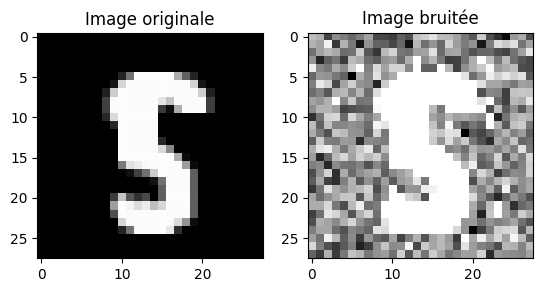

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from keras.datasets import mnist

# Charger les données MNIST
(x_train, _), (_, _) = mnist.load_data()

# Normaliser les valeurs de pixels
x_train = x_train.astype('float32') / 255.0

# Fonction pour ajouter du bruit gaussien à une image
def add_gaussian_noise(image, mean=0, std=0.1):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(image + noise, 0, 1)
    return noisy_image

# Définir les sommets du polyèdre pour contrôler le bruit
polyhedron_vertices = np.array([[0.1, 0.1], [0.5, 0.5], [0.9, 0.1]])

# Créer un polyèdre convexe à partir des sommets
hull = ConvexHull(polyhedron_vertices)

# Fonction pour générer une image bruitée en interpolant entre les sommets du polyèdre
def generate_noisy_image(image, polyhedron_point):
    # Interpolation pour obtenir les paramètres de bruit correspondants
    noise_params = np.dot(polyhedron_point, polyhedron_vertices[hull.vertices])

    # Ajout de bruit gaussien à l'image
    noisy_image = add_gaussian_noise(image, mean=noise_params[0], std=noise_params[1])

    return noisy_image

# Sélection aléatoire d'un point dans le polyèdre
polyhedron_point = np.random.dirichlet(np.ones(len(polyhedron_vertices)))

# Sélection aléatoire d'une image MNIST
index = np.random.randint(0, len(x_train))
image = x_train[index]

# Génération de l'image bruitée
noisy_image = generate_noisy_image(image, polyhedron_point)

# Affichage des images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image originale')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Image bruitée')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from keras.datasets import mnist

# Charger les données MNIST
(x_train, _), (_, _) = mnist.load_data()

# Normaliser les valeurs de pixels
x_train = x_train.astype('float32') / 255.0

# Sélection aléatoire d'une image MNIST
index = np.random.randint(0, len(x_train))
image = x_train[index]

# Définir une variation delta pour les sommets du polyèdre
delta = 0.2

# Créer les sommets du polyèdre en fonction de l'image originale
image_flattened = image.flatten()
polyhedron_vertices = np.array([image_flattened - delta, image_flattened + delta])

# Créer un polyèdre convexe à partir des sommets
hull = ConvexHull(polyhedron_vertices.T)

# Sélection aléatoire d'un point dans le polyèdre
polyhedron_point = np.random.dirichlet(np.ones(len(hull.vertices)), size=1)  # Modifier la taille en 1

# Fonction pour générer une image bruitée en interpolant entre les sommets du polyèdre
def generate_noisy_image(image, polyhedron_point):
    # Interpolation pour obtenir les paramètres de bruit correspondants
    noise_params = np.dot(polyhedron_point, polyhedron_vertices)

    # Remise en forme des paramètres de bruit
    noise_params = noise_params.reshape(-1)  # Modifier la forme en un vecteur

    # Interpolation linéaire entre les sommets du polyèdre
    noise_params = noise_params[0] + polyhedron_point[0][:, np.newaxis] * (noise_params[1] - noise_params[0])

    # Remettre l'image dans sa forme originale
    image_shape = image.shape
    noise_params = noise_params.reshape(image_shape)

    # Ajout de bruit gaussien à l'image
    noisy_image = np.clip(image + noise_params, 0, 1)

    return noisy_image

# Génération de l'image bruitée
noisy_image = generate_noisy_image(image, polyhedron_point)

# Affichage des images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image originale')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Image bruitée')

plt.show()






ValueError: shapes (1,6) and (2,784) not aligned: 6 (dim 1) != 2 (dim 0)